<a href="https://colab.research.google.com/github/JohnnySolo/Data-Analysis-Project---Taxi-Drivers-2024/blob/main/Data_Analysis_Project_Taxi_Drivers_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1: Data Collection & Preprocessing**

<u>NOTE</u>: Our goal in the processing is to keep the data as raw as possible. We'll modify the data only if observations are redundant (for example) or corrupted (for example, NA's in important columns like trip cost etc).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Uploading relevant libraries
import pandas as pd
import numpy as np
import gc

### Step 1.1: Data Collection

In [ ]:
# Uploaded the dataframes from Google Drive
df01 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-01.parquet')
df02 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-02.parquet')
df03 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-03.parquet')
df04 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-04.parquet')
df05 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-05.parquet')
df06 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-06.parquet')
df07 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-07.parquet')
df08 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-08.parquet')
df09 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-09.parquet')
df10 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-10.parquet')
df11 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/yellow_tripdata_2024-11.parquet')

In [ ]:
# List of dataframe variable names
dfs = [df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11]

#### Introduction to the data

* `VendorID`: A code indicating the provider of the trip record **(Binary variable)**.
* `tpep_pickup_datetime`: The date and time the passenger was picked up.
* `tpep_dropoff_datetime`: The date and time the passenger was dropped off.
* `passenger_count`: The number of passengers in the trip **(Integer variable)**.
* `trip_distance`: The distance traveled during the trip **(Continuos variable)**
* `RatecodeID`: The final rate code in effect at the end of the trip **(Categorical variable)**.
* `store_and_fwd_flag`: Indicates whether the trip record was held in vehicle memory before sending to the vendor **(Binary variable)**.
* `PULocationID`: TLC Taxi Zone in which the taximeter was engaged **(Continuos variable)**.
* `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged **(Continuos variable)**.
* `payment_type`: The method of payment (e.g., cash, card). **(Categorical variable)**.
* `fare_amount`: The total fare for the trip **(Continuos variable)**.
* `extra`: extras and surcharges due to rush hour and/or overnight charges **(Continuos variable)**.
* `mta_tax`: Automatically triggered based on the metered rate in use **(Continuos variable)**.
* `tip_amount`: The amount of the passengers tip. Automatically populated for credit card tips only. <u>Cash tips are not included</u> **(Continuos variable)**.
* `tolls_amount`: Total amount of all tolls paid in trip, meaning all the  charges for permission to use a particular bridges or roads **(Continuos variable)**.
* `improvement_surcharge`: An additional fee that may be applied to cover the costs associated with enhancements or upgrades, like using accessible cab **(Continuos variable)**.
* `total_amount`: The total amount charged to passengers. <u>Does not include cash tips</u>. **(Continuos variable)**.
* `congestion_surcharge`: Total amount collected in trip for NYS congestion surcharge **(Continuos variable)**.
* `Airport_fee`: Additional fee of 1.25$ for pick up from LaGuardia or John F. Kennedy Airports **(Continuos variable)**.

For more information, you can look at [TLC website](https://https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page?utm_source=chatgpt.com)



### Step 1.2: Data Preprocessing

#### Data Cleaning and Transformation

Usually, the 1st thing I'll do when I have a new data is take a look on it and see if I can spot any problems. The easiest target is missing values.

In [ ]:
# Check for missing values:
for i, df in enumerate(dfs):
    print(f"df{i+1} Missing values per column:\n", df.isnull().sum())

df1 Missing values per column:
 VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64
df2 Missing values per column:
 VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          185610
trip_distance                 0
RatecodeID               185610
store_and_fwd_flag       185610
PULocationID                  0
DOLocationID                  0
payment_type               

We can see a consistent behavior in the data of missing values in repeated variables. We'll seperate them into tthree categories:

* <u>Logical NA's</u>: There are variables that having missing values makes sense. Those variables are `congestion_surcharge` and `Airport_fee` because not all trips are to the airport, or in congestion hours. **Therefore, missing values here can be substitute by other option like the numerical 0**.

* <u>Unlogical NA's</u>: There are variables that missing values making it hard to classify those observations. Those variables are `passenger_count` (amount of passengers in the trip) and `RatecodeID` (categorizes the trip based on it's ending point). In both of those cases, missing values impact on our ability to learn from these observations and subtitute those NA's by other options (like the mean,mode or median) could potentially impact on our model bias later. **Therefore, we'll omit observations that miss this values due to it's negligible amount**.

* <u>Inert NA's</u>: There are variables that missing values in them don't necessarily have a great impact on our ability to analyze the data, and there's even a chance that having those missing values in them can even help us learn more on our data. There's only one example for this category and it's `store_and_fwd_flag`. This variable indicates whether the trip record was held in vehicle memory **before** sending to the vendor (aka “store and forward”), because the vehicle did not have a connection to the server. It's options are basically yes or no (meaning it's a binary variable). For example, if we'll notice a trend of missing `store_and_fwd_flag` values in expensive trips it could help us detect fraud in those observations and isolate those observations. **Therefore, like with the logical NA's from before, missing values here can be substitute by a third option like the category M (Missing store and forward trip data)**.

In [ ]:
# See the dataframes shape before:
for i, df in enumerate(dfs):
    print(f"df{i+1}:", df.shape)

df1: (2964624, 19)
df2: (3007526, 19)
df3: (3582628, 19)
df4: (3514289, 19)
df5: (3723833, 19)
df6: (3539193, 19)
df7: (3076903, 19)
df8: (2979183, 19)
df9: (3633030, 19)
df10: (3833771, 19)
df11: (3646369, 19)


In [ ]:
# See the total amount of observations before any action:
total = 0
for i, df in enumerate(dfs):
    total = total + df.shape[0]
print(f"The total amount of observations is:", total)

The total amount of observations is: 37501349


In [ ]:
# 1st NA's missing category: Replace missing values with 0 for logical columns
for df in dfs:
    df.loc[:, 'Airport_fee'] = df['Airport_fee'].fillna(0)
    df.loc[:, 'congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

In [ ]:
# 2nd NA's missing category: Remove rows where passenger_count and RatecodeID have missing values
for df in dfs:
    df.dropna(subset=['passenger_count', 'RatecodeID'], inplace=True)

In [ ]:
# 3rd NA's missing category: Replace missing values with 'M' category
for df in dfs:
    df.loc[:, 'store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('M')

After we cleaned those hitchs, we'll continue to the 2nd problem that can appear in a data - duplicates. When we have duplicates and the observations are not unique, it can do problems with data processing and effect our analysis later on. I dont know for sure we have duplicates in our data, but just to make sure, we'll address it.

In [ ]:
# Handle duplicate records:
for i, df in enumerate(dfs):
    df.drop_duplicates(inplace=True)
    print(f"After removing duplicates in df{i+1}:", df.shape)

After removing duplicates in df1: (2824462, 19)
After removing duplicates in df2: (2821915, 19)
After removing duplicates in df3: (3156438, 19)
After removing duplicates in df4: (3105713, 19)
After removing duplicates in df5: (3319167, 19)
After removing duplicates in df6: (3128412, 19)
After removing duplicates in df7: (2797913, 19)
After removing duplicates in df8: (2720516, 19)
After removing duplicates in df9: (3149299, 19)
After removing duplicates in df10: (3439874, 19)
After removing duplicates in df11: (3272695, 19)


Has we can see, there were some duplicates in our data so it's good we omitted those before the analysis.

Now, we'll continue to the next step - searching for unreadable variables. Based on our data dictionary, I'd say that our main suspects are `tpep_pickup_datetime` and `tpep_dropoff_datetime`. Those values are very informative, but the data type is could be from a categorical type and then would be harder to be used in the analysis later on. **Therefore, we'll use a designated function to make sure those variables will be from the relevant type**.

In [ ]:
# Convert datetime columns:
for i, df in enumerate(dfs):
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    print(f"Converted datetime columns in df{i+1}")

Converted datetime columns in df1
Converted datetime columns in df2
Converted datetime columns in df3
Converted datetime columns in df4
Converted datetime columns in df5
Converted datetime columns in df6
Converted datetime columns in df7
Converted datetime columns in df8
Converted datetime columns in df9
Converted datetime columns in df10
Converted datetime columns in df11


We'll sample one observation from each variable to see its data type

In [ ]:
df01['tpep_pickup_datetime'].sample(n=1, random_state=42)

,tpep_pickup_datetime
1530811,2024-01-18 13:51:31


In [ ]:
df01['tpep_dropoff_datetime'].sample(n=1, random_state=42)

,tpep_dropoff_datetime
1530811,2024-01-18 14:08:05


We can see we have the desired data type `datetime` format, therefore it could be used now in our calculations

So far we checked for:

* NA's - missing values
* Duplicates - recurring observations
* Unreadables - illegible variables

The last thing I'd like to check is for unrealistic values. For example, for variables like `fare_amount`, `extra`,`trip_distance` or `trip_duration` there can be only positive values. **Therefore, we'll check if there are unrealistic values in them and if so - omit them**.

In [ ]:
# Filter out unrealistic values:
for i, df in enumerate(dfs):
    df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['extra'] > 0)]
    dfs[i] = df  # Ensure updates are saved to the list
    print(f"Filtered unrealistic values in df0{i+1}, new shape:", df.shape)

Filtered unrealistic values in df01, new shape: (1636271, 19)
Filtered unrealistic values in df02, new shape: (1669974, 19)
Filtered unrealistic values in df03, new shape: (1856819, 19)
Filtered unrealistic values in df04, new shape: (1853156, 19)
Filtered unrealistic values in df05, new shape: (1980940, 19)
Filtered unrealistic values in df06, new shape: (1850968, 19)
Filtered unrealistic values in df07, new shape: (1622396, 19)
Filtered unrealistic values in df08, new shape: (1560737, 19)
Filtered unrealistic values in df09, new shape: (1857136, 19)
Filtered unrealistic values in df010, new shape: (2048739, 19)
Filtered unrealistic values in df011, new shape: (1866477, 19)


We've basically finished with the data preprossecing. Now, I'd like to see the difference in our data amount before and after the preprossecing actions.

In [ ]:
# See the total amount of observations after the Preprocessing actions:
after = 0
for i, df in enumerate(dfs):
    after = after + df.shape[0]
print(f"The total amount of observations is:", after)
print(f"The difference of observations brfore and after:", total-after)
print(f"The percentage from the original data:",(total-after)/total)

The total amount of observations is: 19803613
The difference of observations brfore and after: 17697736
The percentage from the original data: 0.47192265003586936


We can see we lost a significant amount of the in this proccess (around 47.2%), but it's important to notice that this lost data was either duplicate or corrupted (unrealistic, unreadable etc). So we could argue that it wasn't relevant anyway, but even if it was - I'd rather take this chance.

#### Feature Engineering

We'll create new features and variables to try to enhance the dataset for modeling purposes.

<u>Temporal Features</u>: I'll extract `hour`, `day` of `week`, and `month` from the pickup time to identify trends.

In [ ]:
for i, df in enumerate(dfs):
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
    print(f"Extracted temporal features in df{i+1}")

Extracted temporal features in df1
Extracted temporal features in df2
Extracted temporal features in df3
Extracted temporal features in df4
Extracted temporal features in df5
Extracted temporal features in df6
Extracted temporal features in df7
Extracted temporal features in df8
Extracted temporal features in df9
Extracted temporal features in df10
Extracted temporal features in df11


<u>Trip Duration (Optional target Variable)</u>:

In [ ]:
for i, df in enumerate([df01, df02, df03, df04, df05, df06, df07]):
    df.loc[:, 'trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    print(f"Calculated trip duration in df0{i+1}")

Calculated trip duration in df01
Calculated trip duration in df02
Calculated trip duration in df03
Calculated trip duration in df04
Calculated trip duration in df05
Calculated trip duration in df06
Calculated trip duration in df07


In [ ]:
for i, df in enumerate([df08, df09, df10, df11]):
    df.loc[:, 'trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    print(f"Calculated trip duration in df0{7 + i +1}")

Calculated trip duration in df08
Calculated trip duration in df09
Calculated trip duration in df010
Calculated trip duration in df011


<u>Geographical Features</u>: Extract latitude and longitude to analyze trip density.

In [ ]:
for i, df in enumerate([df01, df02, df03, df04, df05, df06, df07]):
    df['trip_distance_log'] = np.log1p(df['trip_distance'])
    print(f"Applied log transformation to trip_distance in df{i+1}")

Applied log transformation to trip_distance in df1
Applied log transformation to trip_distance in df2
Applied log transformation to trip_distance in df3
Applied log transformation to trip_distance in df4
Applied log transformation to trip_distance in df5
Applied log transformation to trip_distance in df6
Applied log transformation to trip_distance in df7


In [ ]:
for i, df in enumerate([df08, df09, df10, df11]):
    df['trip_distance_log'] = np.log1p(df['trip_distance'])
    print(f"Applied log transformation to trip_distance in df{7+i+1}")

Applied log transformation to trip_distance in df8
Applied log transformation to trip_distance in df9
Applied log transformation to trip_distance in df10
Applied log transformation to trip_distance in df11


In [ ]:
# Reapply filtering to remove unrealistic values
for i, df in enumerate([df01, df02, df03, df04, df05, df06, df07,df08]):
    df = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)]
    dfs[i] = df  # Ensure updates are saved to the list
    print(f"Filtered unrealistic values in df0{i+1}, new shape:", df.shape)

Filtered unrealistic values in df01, new shape: (1636237, 24)
Filtered unrealistic values in df02, new shape: (1669954, 24)
Filtered unrealistic values in df03, new shape: (1856768, 24)
Filtered unrealistic values in df04, new shape: (1853131, 24)
Filtered unrealistic values in df05, new shape: (1980914, 24)
Filtered unrealistic values in df06, new shape: (1850927, 24)
Filtered unrealistic values in df07, new shape: (1622366, 24)
Filtered unrealistic values in df08, new shape: (1560720, 24)


In [ ]:
# Reapply filtering to remove unrealistic values
for i, df in enumerate([df09, df10, df11]):
    df = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)]
    dfs[i] = df  # Ensure updates are saved to the list
    print(f"Filtered unrealistic values in df0{i+1}, new shape:", df.shape)

Filtered unrealistic values in df01, new shape: (1857111, 24)
Filtered unrealistic values in df02, new shape: (2048715, 24)
Filtered unrealistic values in df03, new shape: (1865626, 24)


After step 1, our dataset contains the following variables:

<u> Original Variables</u> (19 overall - the same as before).

<u>Engineered Features</u> (5 new variables overall):

* `pickup_hour`: Extracted hour of the day from tpep_pickup_datetime to analyze time-based trends **(Integer variable)**.
* `pickup_day`: Day of the week the trip was taken **(Integer variable)**.
* `pickup_month`: The month of the trip to analyze seasonal trends **(Integer variable)**.
* `trip_duration`: Calculated in minutes by subtracting pickup from drop-off times **(Continuos variable)**.
* `trip_distance_log`: Log-transformed version of trip_distance to reduce skewness **(Continuos variable)**.

**This step can help us know our data better before we'll continue with our analysis.**

---

We'll save the progress for now in case we'll have problems like session crashed along the way.

In [ ]:
# Save Processed DataFrames:
for i, df in enumerate(dfs, start=1):
    # Preprocessing steps
    df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

    # Save after processing each dataframe
    df.to_parquet(f'/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_{i}.parquet', index=False)

    # Free up memory
    del df
    gc.collect()
    print(f"Processed and saved df0{i}")

Processed and saved df01
Processed and saved df02
Processed and saved df03
Processed and saved df04
Processed and saved df05
Processed and saved df06
Processed and saved df07
Processed and saved df08
Processed and saved df09
Processed and saved df010
Processed and saved df011


In [3]:
# Load saved processed dataframes
df01 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_1.parquet')
df02 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_2.parquet')
df03 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_3.parquet')
df04 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_4.parquet')
df05 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_5.parquet')
df06 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_6.parquet')
df07 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_7.parquet')
df08 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_8.parquet')
df09 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_9.parquet')
df10 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_10.parquet')
df11 = pd.read_parquet('/content/drive/My Drive/Projects/Taxi Drivers/cleaned_data/processed_taxi_data_11.parquet')

In [4]:
# List of dataframe variable names
dfs = [df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11]

## **Step 2: Basic Exploratory Data Analysis (EDA)**

### Research Question & Target Variable Selection

From a business perspective, our goal should be to predict total trip fare, as it encapsulates various factors like trip duration, distance, surcharges, and potential traffic congestion.

Therefore, our target Variable will be `total_amount`.

This includes the fare, taxes, surcharges, and tips. Therefore making it a suitable candidate for modeling.

In [5]:
# Upload relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Concatenate all our df's files + adding a "month" column:
dataframes = []
month = 0
for df in dfs:
    df['month'] = month + 1  # Add month identifier
    month = month + 1
    dataframes.append(df)

# Combine all dataframes
all_data = pd.concat(dataframes, ignore_index=True)

# Display merged dataframe shape and first few rows
print("Merged dataframe shape:", all_data.shape)
print(all_data[['month']])  # Displaying month column to verify

Merged dataframe shape: (20411862, 25)
          month
0             1
1             1
2             1
3             1
4             1
...         ...
20411857     11
20411858     11
20411859     11
20411860     11
20411861     11

[20411862 rows x 1 columns]


#### Sampling Strategy

Since working with the entire dataset could be computationally expensive, let's create an equal sample from each month's dataset to ensure a balanced representation.

In [15]:
sample_size = 100000
sampled_dfs = [df.sample(n=sample_size, random_state=42) for df in dfs]
sample = pd.concat(sampled_dfs, ignore_index=True)
print("Balanced dataset shape:", sample.shape)

Balanced dataset shape: (1100000, 25)


#### Step 2.1 (1st visualization): Distribution of the Target Variable (`total_amount`)

* <u>Purpose</u>: Identify skewness, outliers, and trends in fare distribution.

* <u>Visualization</u>: Histogram and Boxplot.

* <u>Assumption</u>: We expect a right-skewed distribution, with a majority of fares being lower and fewer high-value fares.

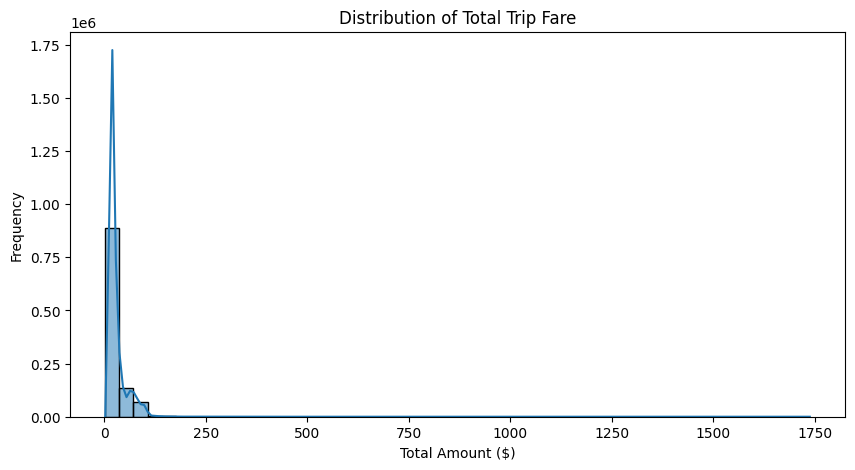

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(sample['total_amount'], bins=50, kde=True)
plt.title('Distribution of Total Trip Fare')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()

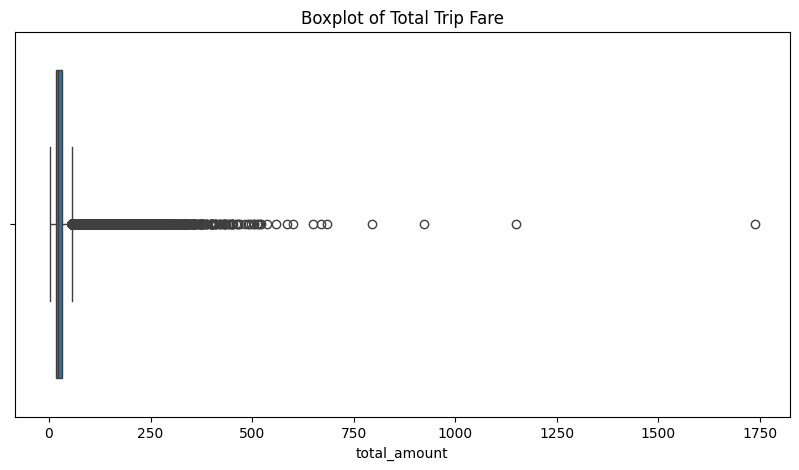

In [17]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=sample['total_amount'])
plt.title('Boxplot of Total Trip Fare')
plt.show()

##### **Findings**:

From the visualizations provided, we observe the following:

* Distribution of Total Trip Fare:
  * The distribution is highly skewed to the right, with most fares concentrated in the lower range.
  * A significant number of extreme values (outliers) exist, contributing to the skewness.
* Boxplot Analysis:
  * The presence of outliers could suggest a need for robust preprocessing techniques, such as transformation or removal, to avoid distortion in predictive modeling.
  * The range of trip fares is broad, with several extreme values that might not reflect typical patterns.


#### Step 2.1 (2nd visualization): Relationship Between `trip_distance` and `fare_amount`

* <u>Purpose</u>: Identify whether distance and fare have a linear relationship or if there are patterns of fare adjustments..

* <u>Visualization</u>: Scatterplot with regression line.

* <u>Assumption</u>: A positive correlation between trip distance and fare amount is expected.

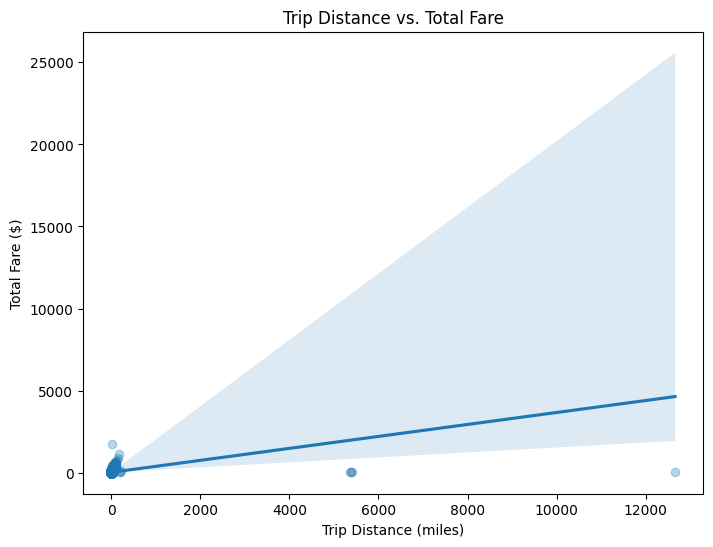

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(x=sample['trip_distance'], y=sample['total_amount'], scatter_kws={'alpha':0.3})
plt.title('Trip Distance vs. Total Fare')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Fare ($)')
plt.show()

##### **Findings**:

From the visualizations provided, we observe that:

* The distribution of total trip fare is heavily skewed to the right, with the majority of fares concentrated at lower values.
* The long tail suggests the presence of high-value fares that may act as outliers.

<u>Implication</u>: This visualization also confirms that **the fare data is not normally distributed** and may require transformation or specialized modeling techniques to handle skewness.


#### Step 2.1 (3rd visualization): Temporal Analysis (`hour` vs. `fare_amount`)

* <u>Purpose</u>: Understand fare patterns across different times of the day.

* <u>Visualization</u>: Boxplot for hourly trends.

* <u>Assumption</u>: Certain hours, such as rush hours, might show higher fares due to demand.

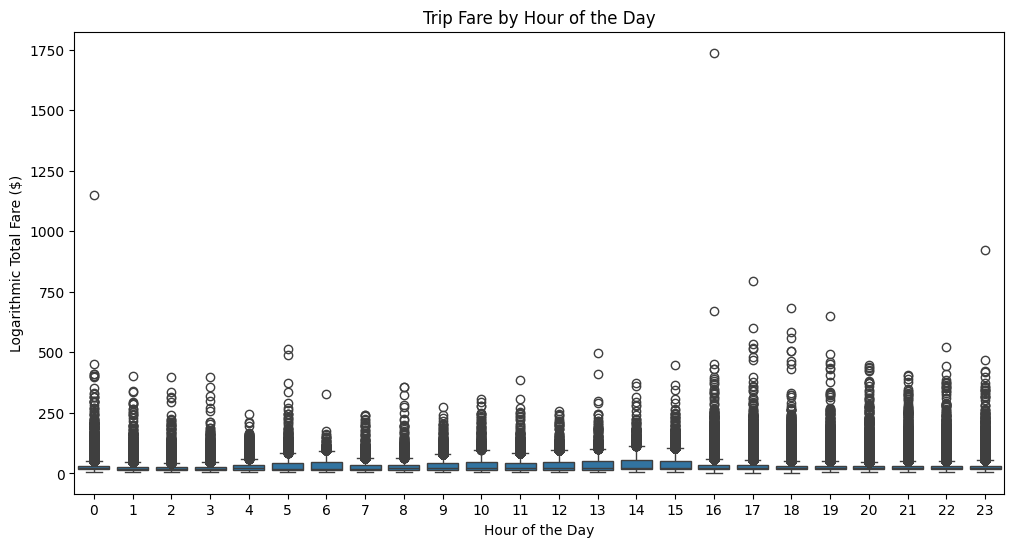

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=sample['pickup_hour'], y=sample['total_amount'])
plt.title('Trip Fare by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Logarithmic Total Fare ($)')
plt.show()

##### **Findings**:

From the visualizations provided, we observe that:
* peak fares (outliers) during rush hours are greater only in the afternoon (mornings seems to have the least outliers), supporting half of the demand hypothesis.
* peak fares (outliers) continue through all the night and the early hours (midnight through 05:00 AM)

This visualization shows that most of the hours have skwed distribution and it's not happening due to specific hours.

<u>Implication</u>: This visualization also confirms that the fare data is not normally distributed, but also that most of the hours have skewed distribution. Therefore, **omitting a portion of the data based on the hour won't improve our fare data normality**.

#### Step 2.1 (4th visualization): Categorical Analysis (`payment_type` Distribution)

* <u>Purpose</u>: Determine the most common payment methods and their relationship with fare.

* <u>Visualization</u>: Bar plot for categorical data.

* <u>Assumption</u>: A significant proportion of creditcard transactions could be expected.

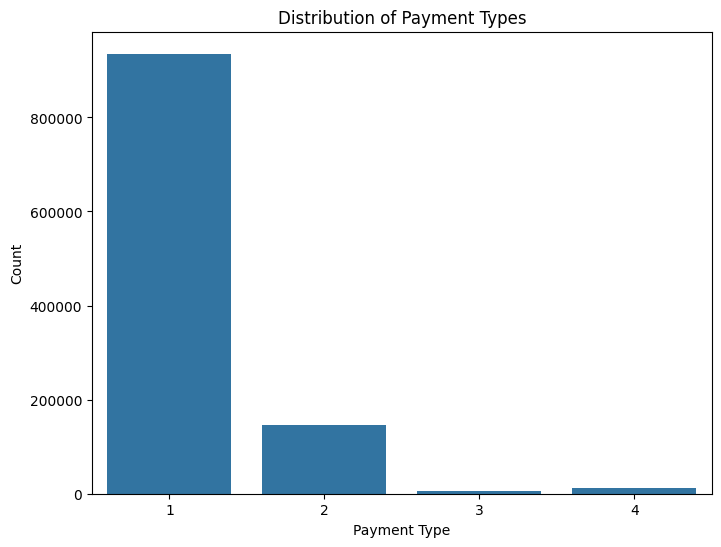

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=sample)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

##### **Findings**:

From the visualizations provided, we observe that Credit card transactions dominate, which aligns with the expected cashless trends in urban areas.

#### Step 2.1 (5th visualization): Correlation Heatmap

* <u>Purpose</u>: Identify multicollinearity among features and decide on potential feature selection.

* <u>Visualization</u>: Heatmap.

* <u>Assumption</u>: Identifying multicollinearity between `total_amount` and `fare_amount` due to the fact that most of the amount is from the fare itself (while taxes and chrges filling the rest).

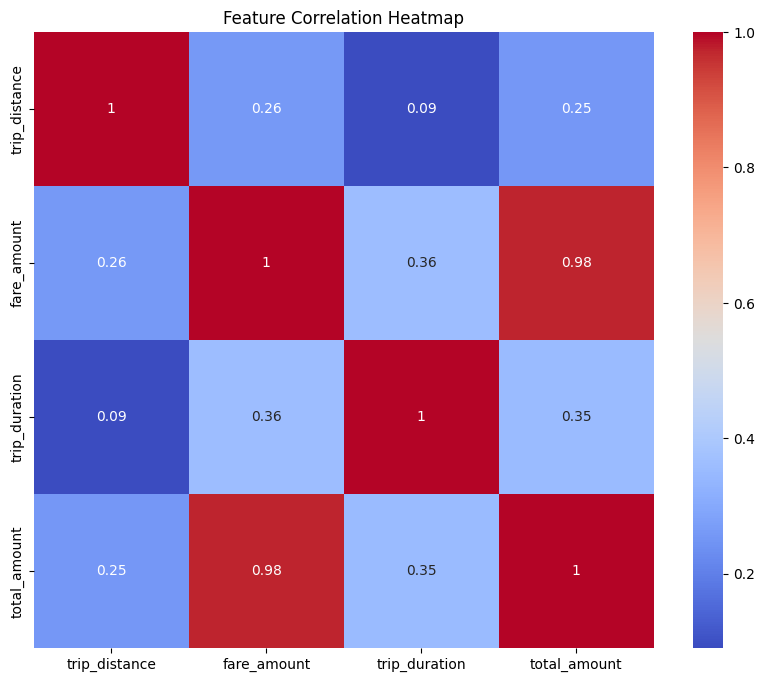

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(sample[['trip_distance', 'fare_amount', 'trip_duration', 'total_amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

##### **Findings**:

From the visualizations provided, we observe that:

* Only `total_amount` and `fare_amount` show the highest correlation, confirming our target relevance and expected.
* Low correlation between `total_amount` and `trip_duration` could imply that the duration of the trip is not impactful as other variables (like hour or passengers quantity).

<u>Implications</u>: **Including both `total_amount` and `trip_duration` in a predictive model could lead to multicollinearity**, and it might be more efficient to focus on one of them.

### Step 2.2: Addressing Skewness by Transformation Options

Given the skewed nature of the data, we'll explore various transformation options, ordered by their impact from least to most extreme:

1. **Log Transformation (Least Intrusive)**: Applying \\( \log(1 + x) \\) transformation can help normalize the data by compressing the range of values and mitigating the impact of outliers.

2. **Box-Cox Transformation (Moderate Effect):** This transformation adjusts data by applying a power function, optimized to make it closer to a normal distribution.

3. **Outlier Removal by IQR Method (Most Extreme)**: Applying an IQR-based filter to remove extreme values beyond 1.5 * IQR.

#### Step 2.2 (1st option): log transformation

In [23]:
sample['total_amount_log'] = np.log1p(sample['total_amount'])

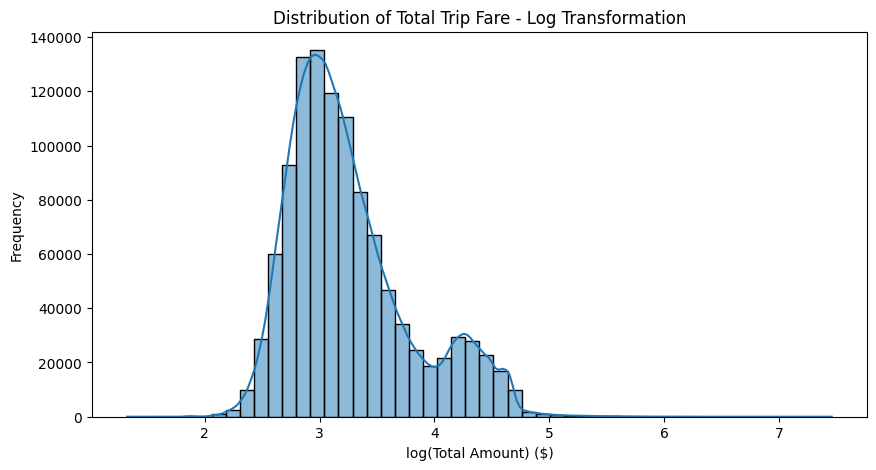

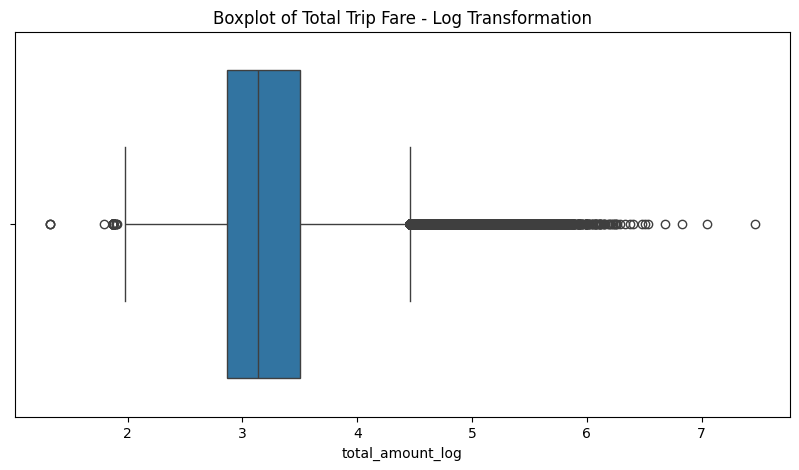

In [25]:
#Applying log transformation on the target variable (total_amount):
sample['total_amount_log'] = np.log1p(sample['total_amount'])

plt.figure(figsize=(10, 5))
sns.histplot(sample['total_amount_log'], bins=50, kde=True)
plt.title('Distribution of Total Trip Fare - Log Transformation')
plt.xlabel('log(Total Amount) ($)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=sample['total_amount_log'])
plt.title('Boxplot of Total Trip Fare - Log Transformation')
plt.show()

##### **Findings**:

The \\(\log(x+1)\\) transformation only shows partial improvement in normality, but did not completely resolve the issue.

<u>Implications</u>: We'll move on to the next option.

#### Step 2.2 (2nd option): Box-Cox transformation

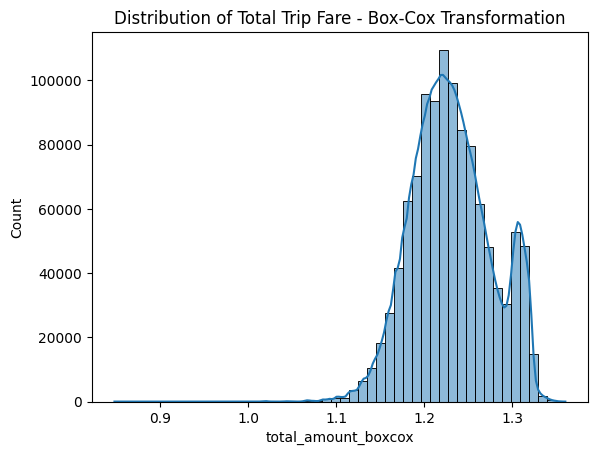

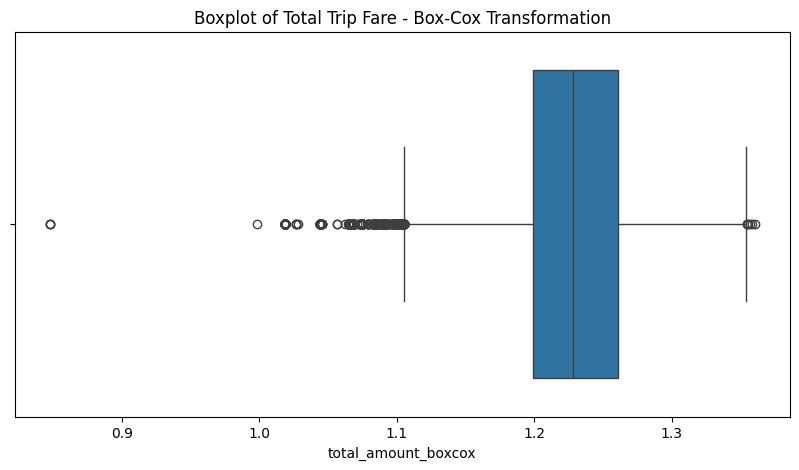

In [27]:
from scipy.stats import boxcox

#Applying Box-Cox transformation on the target variable (total_amount):
sample['total_amount_boxcox'], _ = boxcox(sample['total_amount'] + 1)

sns.histplot(sample['total_amount_boxcox'], bins=50, kde=True)
plt.title('Distribution of Total Trip Fare - Box-Cox Transformation')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=sample['total_amount_boxcox'])
plt.title('Boxplot of Total Trip Fare - Box-Cox Transformation')
plt.show()

##### **Findings**:

The Box-Cox transformation shows improved symmetry but still exhibited skewness.

<u>Implications</u>: We'll move on to the next option.

#### Step 2.2 (3rd option): Outlier Removal by IQR Method

In [29]:
# Creating outliers detection based on the IQR Method:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [30]:
outliers, lb, ub = detect_outliers_iqr(sample, 'total_amount')
print(f"Outliers count: {len(outliers)}")
print(f"Lower Bound: {lb}, Upper Bound: {ub}")

outlier_percentage = (len(outliers) / len(sample)) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Outliers count: 131177
Lower Bound: -6.835000000000004, Upper Bound: 55.685
Percentage of outliers: 11.93%


**<u>NOTE</u>**: We can see that based on this method, almost 12% of our data was defined as outliers, suggesting that the distributions will still be sweked.

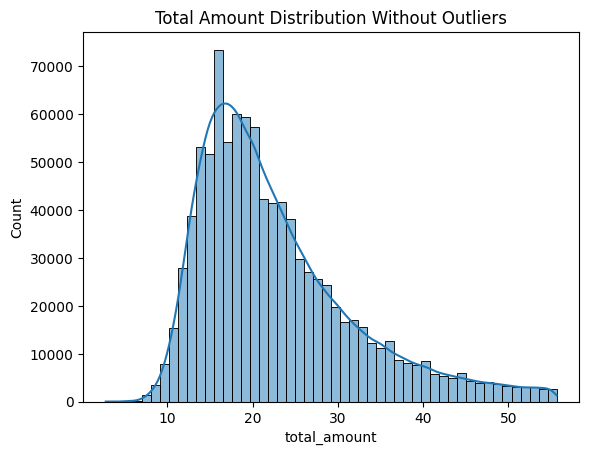

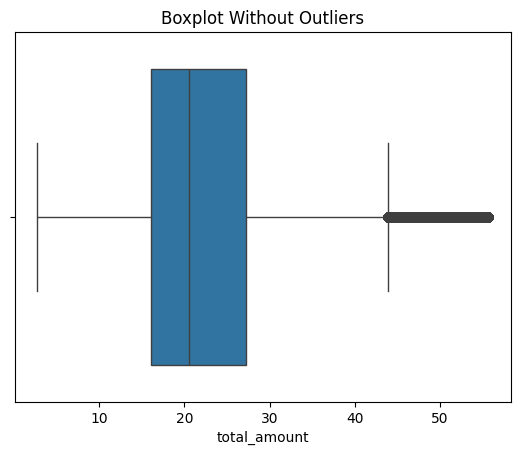

In [31]:
# Remove outliers from the dataset
cleaned_sample = sample[(sample['total_amount'] >= lb) & (sample['total_amount'] <= ub)]

# Plot the distribution after removing outliers
sns.histplot(cleaned_sample['total_amount'], bins=50, kde=True)
plt.title('Total Amount Distribution Without Outliers')
plt.show()

# Boxplot to compare the outliers visualization to the others
sns.boxplot(x=cleaned_sample['total_amount'])
plt.title('Boxplot Without Outliers')
plt.show()

##### **Findings**:

After removing the outliers, the distribution remained skewed.

<u>Implications</u>: The issue lies in the nature of the data itself.

### EDA Conclusions:

1. After the general plots we assumed the data is skewed and could use a transformation to achieve normality.

2. After applying multiple transformation techniques and removing outliers, the data still exhibited a degree of skewness. Given the persistent distribution shape:
  * We conclude that parametric models assuming normality (e.g., linear regression) might not be suitable.
  * Instead, we need a model that can handle skewed and complex data distributions effectively.

## Step 3: Model Selection

Given the characteristics of our dataset, it is best suited for models that handle skewed data efficiently.

### Random Forest Theorem

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode (for classification) or mean (for regression) of their predictions. It improves accuracy and robustness by leveraging the principle of bagging (bootstrap aggregating).

#### Mathematical Formulation
Random Forest is an ensemble learning method that constructs multiple decision trees and aggregates their outputs to improve prediction accuracy and control overfitting.

\\[\hat{f}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)\\]

Where:

* \\( B \\) - Number of decision trees.
* \\( f_b(x) \\) - Prediction from the \\( b \\)-th tree.
* \\( \hat{f}(x) \\) - Final prediction by averaging individual tree predictions (for regression) or majority voting (for classification).

#### Steps in Random Forest Algorithm

1. Bootstrap Sampling: Generate \\( B \\) bootstrap samples from the original dataset by random sampling with replacement.
2. Random Feature Selection:At each node of the decision tree, randomly select \\(m = \sqrt p \\) for classification and \\(m = p/3 \\) for regression.
3. Decision Tree Construction: Grow an unpruned decision tree for each bootstrap sample by recursively splitting on features to minimize impurity (e.g., Gini index or variance).
4. Aggregation: predictions from all trees using
  * Classification: Take the majority vote.
  * Regression: Take the average prediction.

#### Mathematical Considerations
Relevant to our dataset:

* Handling Skewed Data: RF does not assume normality and works well with non-normal distributions.
* Feature Importance: RF calculates importance scores using Gini impurity or mean decrease in impurity.

\\[ GINI(S) = 1 - \sum_{j=1}^{C} p_j^2 \\]

\\[ MSE = \frac{1}{n} \sum_{j=1}^{n} (y_i - \hat{y}) \\]

* Overfitting Control: RF reduces variance by averaging multiple trees trained on different data subsets.

#### Limitations of Random Forest

* Computationally expensive for very large datasets.
* May not perform well on sparse or very high-dimensional data.
* Does not extrapolate well outside training data range.

### Rationale to Choosing Random Forest Model

Random Forest is an ensemble learning method that constructs multiple decision trees and aggregates their outputs to improve prediction accuracy and control overfitting. This model can be relevant due to number of reasons:

1. Handles skewed distributions effectively.

2. Does not assume normality.

3. Provides feature importance for interpretability.

4. Works well with large datasets and high-dimensional spaces

5. Resistant to overfitting compared to single decision trees.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data
X = cleaned_sample[['trip_distance', 'pickup_hour']]
y = cleaned_sample['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 15.113256300559845
Feature: trip_distance, Importance: 0.9512451058120028
Feature: pickup_hour, Importance: 0.04875489418799716
